In [2]:
import numpy as np
import pandas as pd
import math
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import matplotlib.patches as patches
import time
from collections import Counter
import sklearn.cluster as cluster
import time
import hdbscan
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import re

#import plotly. as py
#import plotly.graph_objs as go
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=3) 
sns.set(font_scale = 2)

In [3]:
celldiam = 1e-5
cellvol = celldiam**3
cellvol_liter = cellvol*1e3
L = 1e-2
R = np.array(list(range(1,121))); R = R/2*1e-6 #R = [float(s)/2*1e-6 for s in R] 
nu = 6e-3

s = 0.01 # number of seconds I'd want a cell volume to take to suck in 
Q = cellvol*s**-1 # volumetric flow rate (m^3/s)
dP = 8*Q*nu*L/(np.pi*R**4)
bar = dP/1e5
dP
capvol = np.pi*R**2*L# [np.pi*s**2 for s in R]
capvol
desiredQ = capvol/60
dP_constt = 8*desiredQ*nu*L/(np.pi*R**4)
capvol_liter = capvol*1e3#[c*1e3 for c in capvol]
#capvol_liter
cellsincap= capvol/cellvol
t = 1000 # seconds travel time
requiredQ = cellsincap/t # number of cellvolumes per second 
#requiredQ

Rsel = np.array([2.5, 10, 20])*1e-6


In [118]:
8*desiredQ[4]*nu*L/(np.pi*R[4]**4)

4266.666666666667

In [19]:
capvol/cellvol
data = pd.DataFrame(index=R,columns=['volume_10cm_length','vol_liter','vol_nanoliter', 'numCellsCapTot'])
data['volume_10cm_length'] = [np.pi*r**2*L for r in R]
data['vol_liter'] = [a*1e3 for a in data['volume_10cm_length']]
data['numCellsCapTot'] = [num*1e12 for num in data['vol_liter']] # cell volume take to be 1 pL
data['vol_nanoliter'] = [vol*1e9 for vol in data['vol_liter']]
data
3e-4**2*5e-4*1e3

4.499999999999999e-08

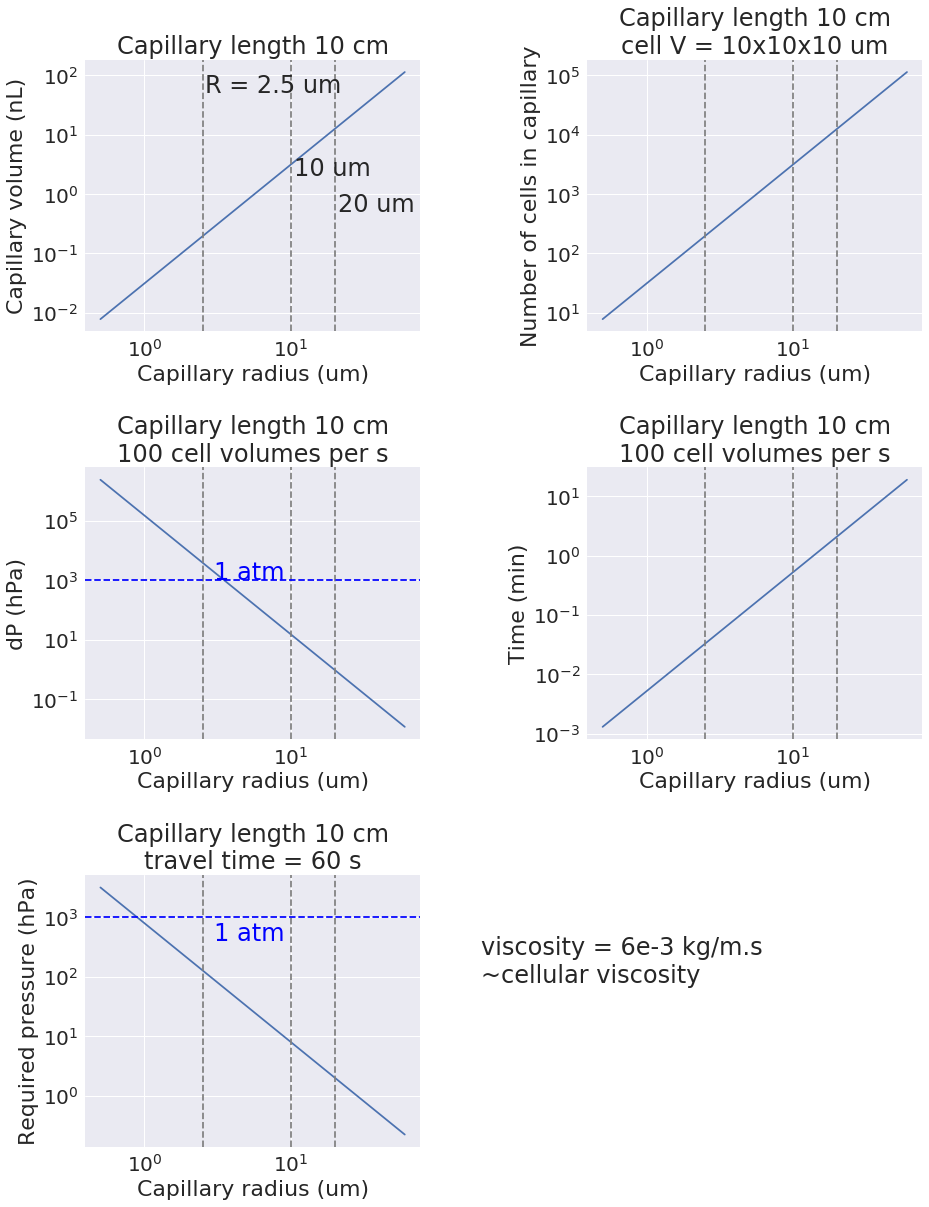

In [5]:
f = plt.figure()
gs = gridspec.GridSpec(3,2)


ax1 = f.add_subplot(gs[0,0])
ax1.loglog(R*1e6,capvol_liter*1e9)
plt.xlabel('Capillary radius (um)')
plt.ylabel('Capillary volume (nL)')
plt.title('Capillary length 10 cm')
plt.axvline(2.5,color='gray',ls='--')
plt.axvline(10,color='gray',ls='--')
plt.axvline(20,color='gray',ls='--')
plt.text(2.6,5e1,'R = 2.5 um');plt.text(10.5,2e0,'10 um');plt.text(21,5e-1,'20 um')

ax2 = f.add_subplot(gs[0,1])
plt.loglog(R*1e6,cellsincap)
plt.xlabel('Capillary radius (um)')
plt.ylabel('Number of cells in capillary')
plt.title('Capillary length 10 cm\ncell V = 10x10x10 um')
plt.axvline(2.5,color='gray',ls='--')
plt.axvline(10,color='gray',ls='--')
plt.axvline(20,color='gray',ls='--')

ax3 = f.add_subplot(gs[1,0])
plt.loglog(R*1e6,dP/100)
plt.xlabel('Capillary radius (um)')
plt.ylabel('dP (hPa)')
plt.title('Capillary length 10 cm\n100 cell volumes per s')
plt.axvline(2.5,color='gray',ls='--')
plt.axvline(10,color='gray',ls='--')
plt.axvline(20,color='gray',ls='--')
plt.axhline(1013,color = 'b',ls='--')
plt.text(3,1050,'1 atm',color='b')

ax4 = f.add_subplot(gs[1,1])
plt.loglog(R*1e6,cellsincap/100/60)
plt.xlabel('Capillary radius (um)')
plt.ylabel('Time (min)')
plt.title('Capillary length 10 cm\n100 cell volumes per s')
plt.axvline(2.5,color='gray',ls='--')
plt.axvline(10,color='gray',ls='--')
plt.axvline(20,color='gray',ls='--')

ax5 = f.add_subplot(gs[2,0])
plt.loglog(R*1e6,dP_constt/100)
plt.xlabel('Capillary radius (um)')
plt.ylabel('Required pressure (hPa)')
plt.title('Capillary length 10 cm\ntravel time = 60 s')
plt.axvline(2.5,color='gray',ls='--')
plt.axvline(10,color='gray',ls='--')
plt.axvline(20,color='gray',ls='--')
plt.axhline(1013,color = 'b',ls='--')
plt.text(3,400,'1 atm',color='b')
plt.text(200,80,'viscosity = 6e-3 kg/m.s\n~cellular viscosity')


"""ax6 = f.add_subplot(gs[1,0])
plt.loglog(R*1e6,capvol_liter*1e9)
plt.xlabel('Capillary radius (um)')
plt.ylabel('Capillary volume (nL)')
plt.title('Capillary length 10 cm')
plt.axvline(2.5,color='gray',ls='--')
plt.axvline(10,color='gray',ls='--')
plt.axvline(20,color='gray',ls='--')"""

gs.update(wspace=.5,hspace=.5)
f.set_figheight(20)
f.set_figwidth(15)
plt.show()

In [68]:
Q

1.0000000000000003e-13

In [137]:
capvol_liter

array([  1.57079633e-11,   6.28318531e-11,   1.41371669e-10,
         2.51327412e-10,   3.92699082e-10,   5.65486678e-10,
         7.69690200e-10,   1.00530965e-09,   1.27234502e-09,
         1.57079633e-09,   1.90066356e-09,   2.26194671e-09,
         2.65464579e-09,   3.07876080e-09,   3.53429174e-09,
         4.02123860e-09,   4.53960138e-09,   5.08938010e-09,
         5.67057474e-09,   6.28318531e-09,   6.92721180e-09,
         7.60265422e-09,   8.30951257e-09,   9.04778684e-09,
         9.81747704e-09,   1.06185832e-08,   1.14511052e-08,
         1.23150432e-08,   1.32103971e-08,   1.41371669e-08,
         1.50953527e-08,   1.60849544e-08,   1.71059720e-08,
         1.81584055e-08,   1.92422550e-08,   2.03575204e-08,
         2.15042017e-08,   2.26822990e-08,   2.38918121e-08,
         2.51327412e-08,   2.64050863e-08,   2.77088472e-08,
         2.90440241e-08,   3.04106169e-08,   3.18086256e-08,
         3.32380503e-08,   3.46988909e-08,   3.61911474e-08,
         3.77148198e-08,

In [135]:
capvol/cellvol

array([  1.57079633e+01,   6.28318531e+01,   1.41371669e+02,
         2.51327412e+02,   3.92699082e+02,   5.65486678e+02,
         7.69690200e+02,   1.00530965e+03,   1.27234502e+03,
         1.57079633e+03,   1.90066356e+03,   2.26194671e+03,
         2.65464579e+03,   3.07876080e+03,   3.53429174e+03,
         4.02123860e+03,   4.53960138e+03,   5.08938010e+03,
         5.67057474e+03,   6.28318531e+03,   6.92721180e+03,
         7.60265422e+03,   8.30951257e+03,   9.04778684e+03,
         9.81747704e+03,   1.06185832e+04,   1.14511052e+04,
         1.23150432e+04,   1.32103971e+04,   1.41371669e+04,
         1.50953527e+04,   1.60849544e+04,   1.71059720e+04,
         1.81584055e+04,   1.92422550e+04,   2.03575204e+04,
         2.15042017e+04,   2.26822990e+04,   2.38918121e+04,
         2.51327412e+04,   2.64050863e+04,   2.77088472e+04,
         2.90440241e+04,   3.04106169e+04,   3.18086256e+04,
         3.32380503e+04,   3.46988909e+04,   3.61911474e+04,
         3.77148198e+04,

In [122]:
cellvol

1.0000000000000003e-15

In [133]:
a =capvol_liter/cellvol_liter
a[4]

392.69908169872394

In [6]:
cellvol_liter

1.0000000000000002e-12

In [7]:
capvol_liter

3.9269908169872415e-08